# Introduction
Data yang digunakan merupakan data Uber dan Lyft yang terdiri dari 57 atribut. Data ini akan digunakan untuk membuat model prediksi harga berdasarkan fitur-fitur tertentu. Dari ke 57 fitur tersebut diputuskan untuk menggunakan hanya 10 fitur yang diduga memiliki pengaruh terhadap harga. Berikut fitur-fitur yang digunakan :
x :
- temperature - suhu udara pada waktu penumpang menggunakan taxi
- short summary - cuaca saat penumpang menggunakan taxi
- wind Speed - kecepatan angin  
- distance- jarak dari titik penjemputan sampai lokasi tujuan
- hour - waktu saat penjemputan
- cab_type- nama taxi yang digunakan
- name : Lyft, Lyft XL,Lux, Lux Black, Lux Black XL
- month- bulan pada saat penumpang menaiki taxi

y:
- price

Fitur-fitur x  akan dieksplorasi lebih lanjut untuk memastikan korelasinya dengan y  (harga). 
Selanjutnya akan dilakukan data preprocessing untuk menyiapkan data agar dapat digunakan untuk membuat model machine learning

# Import Library

In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import scipy

# Data Loading

In [2]:
df=pd.read_csv("d:Hactiv8/dataset/rideshare_kaggle.csv")
pd.set_option("display.max.columns", None)
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [3]:
df.shape

(693071, 57)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [5]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,35.881222,0.008922,0.146076,0.741119,6.186253,8.469860,1.544049e+09,8.467970,45.040982,1.544050e+09,34.150736,1.544102e+09,41.614054,1.544050e+09,30.139824,1.544099e+09,31.656256,1010.094766,220.055853,0.686502,0.248908,8.467970,313.513635,1.544027e+09,1.544060e+09,0.579066,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,7.918707,0.026901,0.328938,0.138595,3.148223,5.289179,6.928244e+05,2.602888,5.996541,6.937921e+05,6.383163,6.922923e+05,7.666138,6.941699e+05,8.057468,6.927378e+05,9.142355,13.472899,99.102736,0.358534,0.474097,2.602888,27.953061,6.911393e+05,6.906634e+05,0.244705,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.900000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.680000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,40.080000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.120000,1.544818e+09

dataset tersebut hanya memuat data pada bulan 11 dan 12 ditahun 2009 

# Data Cleaning

In [6]:
#mengambil fitur-fitur yang akan digunakan untuk linear regression dan menyimpannya dalam variabel baru
use_cols=['cab_type','name','hour','month','distance','temperature','short_summary','windSpeed','price']
df_for_LR=df[use_cols]
df_for_LR.head()

,cab_type,name,hour,month,distance,temperature,short_summary,windSpeed,price
0,Lyft,Shared,9,12,0.44,42.34,Mostly Cloudy,8.66,5.0
1,Lyft,Lux,2,11,0.44,43.58,Rain,11.98,11.0
2,Lyft,Lyft,1,11,0.44,38.33,Clear,7.33,7.0
3,Lyft,Lux Black XL,4,11,0.44,34.38,Clear,5.28,26.0
4,Lyft,Lyft XL,3,11,0.44,37.44,Partly Cloudy,9.14,9.0


In [7]:
#Memeriksa missing value
df_for_LR.isnull().sum()

cab_type             0
name                 0
hour                 0
month                0
distance             0
temperature          0
short_summary        0
windSpeed            0
price            55095
dtype: int64

Terdapat missing value pada fitur price, melihat ada cukup banyak missing value yaitu ada sebanyak 55.095 baris, maka missing value ini akan didrop tetapi tidak akan dibuang melainkan dsimpan dalam variabel tersendiri untuk nantinya diisi setelah model machine learning telah dibuat

In [8]:
#memisahkan baris yang mengandung missing value
df_for_LR_NA=df_for_LR[df['price'].isnull()==True]
df_for_LR_NA.head()

,cab_type,name,hour,month,distance,temperature,short_summary,windSpeed,price
18,Uber,Taxi,14,12,1.11,36.99,Partly Cloudy,5.87,NaN
31,Uber,Taxi,23,12,2.48,48.83,Overcast,2.83,NaN
40,Uber,Taxi,20,11,2.94,42.50,Partly Cloudy,10.68,NaN
60,Uber,Taxi,20,12,1.16,33.15,Mostly Cloudy,3.02,NaN
69,Uber,Taxi,13,11,2.67,31.80,Clear,2.10,NaN


In [9]:
df_for_LR_NA.shape

(55095, 9)

In [10]:
df_for_LR_NA['cab_type'].value_counts()

Uber    55095
Name: cab_type, dtype: int64

seluruh baris yang memiliki missing value merupakan data uber

In [11]:
#meghapus baris yang terdapat missing value 
df_for_LR=df_for_LR.dropna()
df_for_LR.head()

,cab_type,name,hour,month,distance,temperature,short_summary,windSpeed,price
0,Lyft,Shared,9,12,0.44,42.34,Mostly Cloudy,8.66,5.0
1,Lyft,Lux,2,11,0.44,43.58,Rain,11.98,11.0
2,Lyft,Lyft,1,11,0.44,38.33,Clear,7.33,7.0
3,Lyft,Lux Black XL,4,11,0.44,34.38,Clear,5.28,26.0
4,Lyft,Lyft XL,3,11,0.44,37.44,Partly Cloudy,9.14,9.0


In [12]:
df_for_LR.shape

(637976, 9)

mengganti nama kolom :
- cab_type menjadi companies
- name menajadi service_class
- windSpeed menjadi wind_speed
- hour menjadi time
- short_summary menjadi weather


In [13]:
df_for_LR.rename(columns={'cab_type':'companies','hour':'time',
                         'short_summary':'weather',
                          'name':'service_class','windSpeed':'wind_speed'},inplace=True)
df_for_LR.head(3)

,companies,service_class,time,month,distance,temperature,weather,wind_speed,price
0,Lyft,Shared,9,12,0.44,42.34,Mostly Cloudy,8.66,5.0
1,Lyft,Lux,2,11,0.44,43.58,Rain,11.98,11.0
2,Lyft,Lyft,1,11,0.44,38.33,Clear,7.33,7.0


# Data Exploration

In [14]:
#Melihat deskripsi statistik singkat data yang digunakan
df_for_LR.describe()

,time,month,distance,temperature,wind_speed,price
count,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000
mean,11.618528,11.586550,2.189261,39.582406,6.186795,16.545125
std,6.948776,0.492452,1.135413,6.725500,3.147856,9.324359
min,0.000000,11.000000,0.020000,18.910000,0.450000,2.500000
25%,6.000000,11.000000,1.270000,36.450000,3.410000,9.000000
50%,12.000000,12.000000,2.160000,40.490000,5.910000,13.500000
75%,18.000000,12.000000,2.930000,43.580000,8.410000,22.500000
max,23.000000,12.000000,7.860000,57.220000,15.000000,97.500000


- rata-rata penumpang menggunakan taxi sekitar pukul 12
- jarak yang ditempuh berkisar 0.02 hingga 7.86, dengan rata-rata 2.19
- suhu udara cukup bervariasi mulai dari 18.91 hingga 57.22 dengan rata-rata suhu udara 39.5 
- kecepatan angin ada direntang 0.45 hingga 15 dengan rata-rata 6.19
- tarif taxi berkisar di 2.5 hingga paling tinggi 97.5 dan rata-rata 16.5

## Data Exploration each Feature

### Companies

In [15]:
#melihat jumlah data pada masing-masing perusahaan 
df_companies=pd.DataFrame(df_for_LR['companies'].value_counts())
df_companies

,companies
Uber,330568
Lyft,307408


Dataset yang digunakan memuat dua perusahaan taxi yaitu Uber dan Lyft

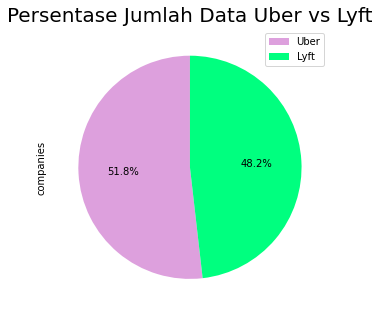

In [16]:
#membandingkan jumlah data masing-masing perusahaan
df_companies['companies'].plot(kind='pie', figsize=(5,6),
                              autopct='%1.1f%%',startangle=90,
                              labels=None, colors=['plum','springgreen'])
plt.title('Persentase Jumlah Data Uber vs Lyft', fontsize=20)
plt.legend(labels=df_companies.index)
plt.show()

Data Uber dan Lyft yang tersedia cukup imbang dengan selisih hanya 3.6% sehingga cukup baik untuk nantinya digunakan saat melatih model prediksi

### service_class

In [17]:
#Melihat layanan yang tersedia pada taxi Lyft
df_for_LR[(df_for_LR['companies']=='Lyft')].groupby(['service_class'])['service_class'].count()

service_class
Lux             51235
Lux Black       51235
Lux Black XL    51235
Lyft            51235
Lyft XL         51235
Shared          51233
Name: service_class, dtype: int64

Layanan taxi Lyft terbagi menjadi 6 kelas seperti yang diperlihatkan data diatas dan datanya terdistribusi sama rata

In [18]:
#Melihat layanan yang tersedia pada taxi Uber
df_for_LR[(df_for_LR['companies']=='Uber')].groupby(['service_class'])['service_class'].count()

service_class
Black        55095
Black SUV    55096
UberPool     55091
UberX        55094
UberXL       55096
WAV          55096
Name: service_class, dtype: int64

Layanan taxi uber juga terbagi menjadi 6 kelas dan terdistribusi sama rata 

### time

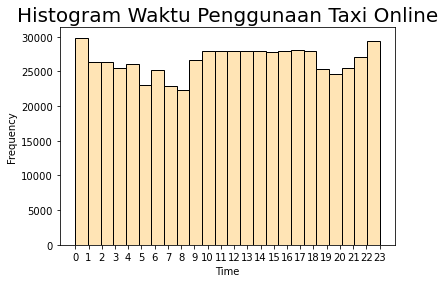

In [19]:
#Melihat distribusi waktu penumpang taxi
bin_edges=[i for i in range(0,24)]
df_for_LR['time'].plot(kind='hist',edgecolor='black',
                       xticks=bin_edges, bins=24,
                      color='moccasin')
plt.title('Histogram Waktu Penggunaan Taxi Online', fontsize=20)
plt.xlabel('Time')
plt.show()

Dari histogram tersebut dapat dilihat waktu penggunaan taxi online ramai pada pukul 00.00 hingga pukul 23.00 hingga 01.00 dan permintaan taxi online tidak terlalu tinggi pada pagi hari di pukul 04.00 - 08.00 kemudian mulai meningkat dipukul 09.00 hingga 18.00

In [20]:
#melihat distribusi waktu pada taxi Lyft
df_time_Lyft=pd.DataFrame(df_for_LR[df_for_LR['companies']=='Lyft']['time'].value_counts())
df_time_Lyft=df_time_Lyft.reset_index()
df_time_Lyft=df_time_Lyft.rename(columns={'index':'time','time':'value_counts'})
df_time_Lyft=df_time_Lyft.set_index('time').sort_index()
df_time_Lyft.head()

,value_counts
time,
0,14657
1,12669
2,12548
3,12224
4,12502


In [21]:
#melihat 5 data waktu dengan permintaan terendah
df_time_Lyft.sort_values('value_counts').head(5)

,value_counts
time,
8,10700
7,11024
5,11155
20,11715
6,11935


In [22]:
#melihat data waktu dengan permintaan tertinggi
df_time_Lyft.sort_values('value_counts').tail(5)

,value_counts
time,
13,13503
12,13633
17,13853
23,14004
0,14657


Data pada taxi Lyft menunjukan hasil yang serupa dengan data keseluruhan dimana pada pagi hari pukul 05.00-08.00 permintaan taxi online paling rendah, sedangkan ramai dimalam hari pada pukul 23.00-00.00


In [23]:
#melihat distribusi waktu pada taxi Lyft
df_time_Uber=pd.DataFrame(df_for_LR[df_for_LR['companies']=='Uber']['time'].value_counts())
df_time_Uber=df_time_Uber.reset_index()
df_time_Uber=df_time_Uber.rename(columns={'index':'time','time':'value_counts'})
df_time_Uber=df_time_Uber.set_index('time').sort_index()
df_time_Uber.head()

,value_counts
time,
0,15215
1,13641
2,13775
3,13306
4,13623


In [24]:
#melihat 5 data waktu dengan permintaan terendah
df_time_Uber.sort_values('value_counts').head(5)

,value_counts
time,
8,11637
5,11840
7,11906
20,12905
19,12949


In [25]:
#melihat 5 data waktu dengan permintaan tertinggi
df_time_Uber.sort_values('value_counts').tail(5)

,value_counts
time,
10,14593
16,14623
14,14670
0,15215
23,15351


Data pada taxi uber juga menunjukan hasil yang serupa dengan data keseluruhan dan juga data Lyft dimana waktu dengan permintaan rendah ada dipukul 05.00-08.00 dan permintaan yang tinggi pada pukul 23.00-00.00

### month

In [26]:
#melihat jumlah data pada masing-masing bulan 
df_month=pd.DataFrame(df_for_LR['month'].value_counts())
df_month.head()

,month
12,374205
11,263771


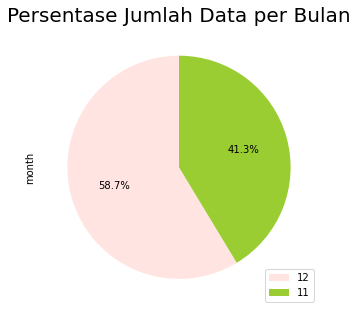

In [27]:
#membandingkan jumlah data masing-masing bulan

df_month['month'].plot(kind='pie', figsize=(5,6),
                              autopct='%1.1f%%',startangle=90,
                              labels=None, colors=['mistyrose','yellowgreen'])
plt.title('Persentase Jumlah Data per Bulan', fontsize=20)
plt.legend(labels=df_month.index)
plt.show()

Data pengguna taxi online pada bulan 12 lebih banyak dibandingkan pada bulan 11

### distance

In [28]:
df_distance=pd.DataFrame(df_for_LR['distance'])
df_distance.head()

,distance
0,0.44
1,0.44
2,0.44
3,0.44
4,0.44


In [48]:
df_distance_Lyft=pd.DataFrame(df_for_LR[df_for_LR['companies']=='Lyft']['distance'])
df_distance_Lyft.reset_index(drop=True, inplace=True)
df_distance_Lyft.head()

,distance
0,0.44
1,0.44
2,0.44
3,0.44
4,0.44


In [47]:
df_distance_Uber=pd.DataFrame(df_for_LR[df_for_LR['companies']=='Uber']['distance'])
df_distance_Uber.reset_index(drop=True, inplace=True)
df_distance_Uber.head()

,distance
0,1.11
1,1.11
2,1.11
3,1.11
4,1.11


Text(0.5, 1.0, 'Uber')

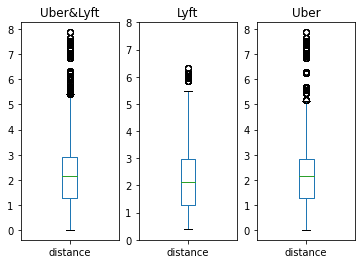

In [49]:
fig=plt.figure()
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)

#Boxplot distance dari seluruh data
df_distance.plot(kind='box',ax=ax1)
ax1.set_title('Uber&Lyft')
#Boxplot distance dari data Lyft
yticks=[i for i in range (0,9)]
df_distance_Lyft.plot(kind='box',ax=ax2, yticks=yticks)
ax2.set_title('Lyft')
#Boxplot distance dari data Uber
df_distance_Uber.plot(kind='box', ax=ax3)
ax3.set_title('Uber')

In [32]:
#statistik deskriptif dari data fitur distance keseluruhan
scipy.stats.describe(df_distance)

DescribeResult(nobs=637976, minmax=(array([0.02]), array([7.86])), mean=array([2.1892611]), variance=array([1.28916272]), skewness=array([0.81684657]), kurtosis=array([1.15151959]))

In [33]:
#statistik deskriptif dari data fitur distance Lyft
scipy.stats.describe(df_distance_Lyft)

DescribeResult(nobs=307408, minmax=(array([0.39]), array([6.33])), mean=array([2.18697558]), variance=array([1.18074666]), skewness=array([0.54020413]), kurtosis=array([-0.13834276]))

In [34]:
#statistik deskriptif dari data fitur distance Uber
scipy.stats.describe(df_distance_Uber)

DescribeResult(nobs=330568, minmax=(array([0.02]), array([7.86])), mean=array([2.19138649]), variance=array([1.38997752]), skewness=array([1.01398]), kurtosis=array([1.96750196]))

- Rata-rata pada data jarak keseluruhan, data jarak Lyft, dan data jarak Uber menunjukan hasil yang serupa dengan selisih yang sangat kecil. Jarakt rata-ratanya yaitu 2.19
- sebaran datanya juga tidak berbeda jauh dengan varian=1.18 untuk Lyft dan 1.39 untuk Uber namun varian tersebut juga menunjukan bahwa data pada Uber lebih bervariasi dibandingkan Lyft (dapat dilihat dari gambar boxplot yang menunjukan data jarak pada Uber memiliki lebih banyak data pencilan dibanding Lyft)
- skewnes atau kemencengan pada data cukup bervariasi nilainya namun baik data jarak keseluruhan, data jarak Lyft, maupun Uber distribusinya adalah miring kekanan, namun kemiringannya masih dekat dengan distribusi normal dimana data jarak pada Lyft paling mendekati distribusi normal.
- kurtosis atau koefisien keruncingan pada data jarak keseluruhan, Lyft, dan Uber menunjukan kurva platikurtik dengan koefisien keruncingan < 3

### temperature

In [45]:
#mengambil data temperature
df_temperature=pd.DataFrame(df_for_LR['temperature'])
df_temperature_Lyft=pd.DataFrame(df_for_LR.loc[(df_for_LR['companies']=='Lyft'),
                                 'temperature'])
df_temperature_Lyft.reset_index(drop=True, inplace=True)
df_temperature_Uber=pd.DataFrame(df_for_LR.loc[(df_for_LR['companies']=='Uber'),'temperature'])
df_temperature_Uber.reset_index(drop=True, inplace=True)

In [51]:
df_temperature.head()

,temperature
0,42.34
1,43.58
2,38.33
3,34.38
4,37.44


In [52]:
df_temperature_Lyft.head()

,temperature
0,42.34
1,43.58
2,38.33
3,34.38
4,37.44


In [53]:
df_temperature_Uber.head()

,temperature
0,40.13
1,20.38
2,32.85
3,41.29
4,31.25


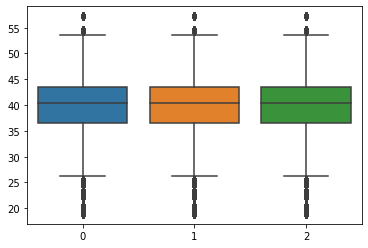

In [67]:
#memvisualisasikan data temperature
sns.boxplot(data=[df_temperature['temperature'],df_temperature_Lyft['temperature'],df_temperature_Uber['temperature']])
plt.show()

In [75]:
df_temperature.describe()

,temperature
count,637976.000000
mean,39.582406
std,6.725500
min,18.910000
25%,36.450000
50%,40.490000
75%,43.580000
max,57.220000


In [71]:
df_temperature_Lyft.describe()

,temperature
count,307408.000000
mean,39.596384
std,6.730425
min,18.910000
25%,36.450000
50%,40.490000
75%,43.580000
max,57.220000


In [76]:
df_temperature_Uber.describe()

,temperature
count,330568.000000
mean,39.569407
std,6.720901
min,18.910000
25%,36.450000
50%,40.490000
75%,43.580000
max,57.220000


Data pada fitur temperature secara keseluruhan, pada data Lyft, dan juga Uber memiliki sebaran yang serupa bahkan mendekati sama. nilai tengah dan raatnya sama, serta standar deviasi juga sama. Bahkan data pencilannya juga serupa(dapat dilihat melalui boxplot)

### weather

In [82]:
df_for_LR['weather'].unique()

array([' Mostly Cloudy ', ' Rain ', ' Clear ', ' Partly Cloudy ',
       ' Overcast ', ' Light Rain ', ' Foggy ', ' Possible Drizzle ',
       ' Drizzle '], dtype=object)

fitur cuaca terdiri dari 9 label

In [125]:
#membuat dataframe yang berisi jumlah data peumpang berdasar cuace
df_weather=pd.DataFrame(df_for_LR.groupby(['weather'])['weather'].value_counts())
df_weather=df_weather.rename(columns={'weather':'value'})
df_weather.reset_index(drop=True,inplace=True)
df_weather['weather']=['clear','Drizzle','Foggy','Light Rain','Mostly Cloudy',
                      'Overcast','Partly Cloudy','Possible Drizzle','Rain']
df_weather=df_weather.set_index('weather')
df_weather


,value
weather,
clear,80256
Drizzle,6725
Foggy,8292
Light Rain,50488
Mostly Cloudy,134603
Overcast,201429
Partly Cloudy,117226
Possible Drizzle,17176
Rain,21781


In [194]:
#menyiapkan dataframe untuk ploting pie chart
df_weather_all=pd.DataFrame(df_for_LR.groupby(['weather'])['companies'].value_counts())
df_weather_all=df_weather_all.rename(columns={'companies':'value'})
df_weather_all.head()

value
weather   companies       
 Clear    Uber       41603
          Lyft       38653
 Drizzle  Uber        3614
          Lyft        3111
 Foggy    Uber        4290

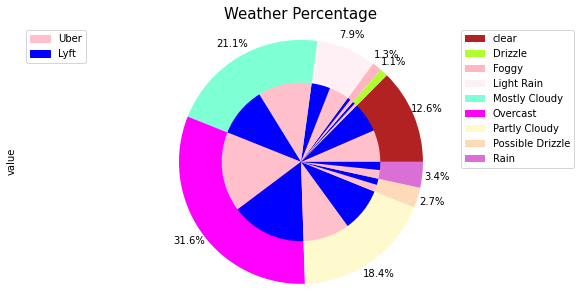

In [218]:
#Visualisasi fitur weather

colors=['firebrick','greenyellow','lightpink','lavenderblush',
       'aquamarine','fuchsia','lemonchiffon','peachpuff',
       'orchid']
colors2=['pink','blue']

df_weather['value'].plot(kind='pie', colors=colors,labels=None,
                        figsize=(10,5), autopct='%1.1f%%', pctdistance=1.12)
df_weather_all['value'].plot(kind='pie', radius=0.65,colors=colors2,
                            labels=None)

plt.title('Weather Percentage', fontsize=15)

leg1=plt.legend(labels=df_weather.index)
ax=plt.gca().add_artist(leg1)
patch_uber=mpatches.Patch(color='pink',label='Uber')
patch_lyft=mpatches.Patch(color='blue', label='Lyft')
leg2=plt.legend(handles=[patch_uber,patch_lyft],loc='upper left')

plt.axis('equal')
plt.show()


- dari pie chart diatas dapat dilihat bahwa sebagian besar penumpang taxi online menggunakan layanan pada saat cuaca mendung, mendung sebagian, maupun hampir kseluruhannya mendung.
- justru saat cuaca sedang gerimis sangat sedikit penumpang yang menggunakan taxi onlie, bahkan saat cuaca hujan data hanya menunjukan 3.4%. Terdapa beberapa kemungkinan dalam hal ini seperti cuaca pada bulan 11 dan 12 jarang hujan, penumpang memiliki alternatif kendaraan lain saat sedang hujan, atau penumpang memilih tidak bepergian saat sedang hujan, serta berbagai kemungkinan lain yang perlu dianalisa lebih lanjut dengan data dari sumber lain.
- Baik Uber dan Lyft menunjukan pembagian data yang rata pada masing-masing label cuaca.

### wind_speed

In [104]:
import matplotlib
for x,y in matplotlib.colors.cnames.items():
    print(x,y)

aliceblue #F0F8FF
antiquewhite #FAEBD7
aqua #00FFFF
aquamarine #7FFFD4
azure #F0FFFF
beige #F5F5DC
bisque #FFE4C4
black #000000
blanchedalmond #FFEBCD
blue #0000FF
blueviolet #8A2BE2
brown #A52A2A
burlywood #DEB887
cadetblue #5F9EA0
chartreuse #7FFF00
chocolate #D2691E
coral #FF7F50
cornflowerblue #6495ED
cornsilk #FFF8DC
crimson #DC143C
cyan #00FFFF
darkblue #00008B
darkcyan #008B8B
darkgoldenrod #B8860B
darkgray #A9A9A9
darkgreen #006400
darkgrey #A9A9A9
darkkhaki #BDB76B
darkmagenta #8B008B
darkolivegreen #556B2F
darkorange #FF8C00
darkorchid #9932CC
darkred #8B0000
darksalmon #E9967A
darkseagreen #8FBC8F
darkslateblue #483D8B
darkslategray #2F4F4F
darkslategrey #2F4F4F
darkturquoise #00CED1
darkviolet #9400D3
deeppink #FF1493
deepskyblue #00BFFF
dimgray #696969
dimgrey #696969
dodgerblue #1E90FF
firebrick #B22222
floralwhite #FFFAF0
forestgreen #228B22
fuchsia #FF00FF
gainsboro #DCDCDC
ghostwhite #F8F8FF
gold #FFD700
goldenrod #DAA520
gray #808080
green #008000
greenyellow #ADFF2F
